In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
data=sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
data['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

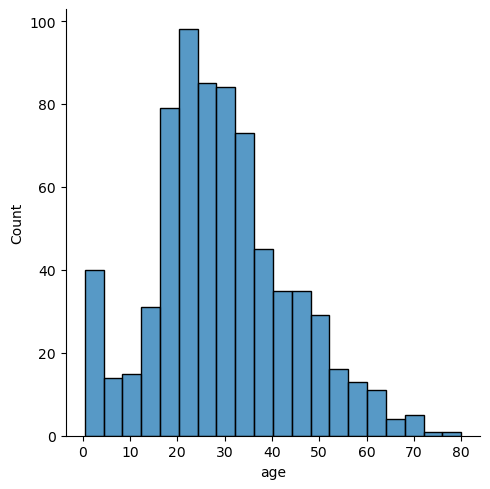

In [6]:
import matplotlib_inline
sns.displot(data['age'])

In [7]:
agegroup=data.groupby(['sex','pclass'])['age'].describe()
agegroup

count       mean        std   min     25%   50%    75%   max
sex    pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

In [8]:
age_by_pclass_sex = data.groupby(['sex', 'pclass'])['age'].apply(lambda x:x.isna().sum())
age_by_pclass_sex   ### total 177 

sex     pclass
female  1          9
        2          2
        3         42
male    1         21
        2          9
        3         94
Name: age, dtype: int64

In [9]:
data.groupby(['sex','pclass'])['age'].apply(lambda x:x.notnull().sum())

sex     pclass
female  1          85
        2          74
        3         102
male    1         101
        2          99
        3         253
Name: age, dtype: int64

In [10]:
#data.groupby(['sex','pclass'])['age'].apply(lambda x: np.median(x.dropna()))    -----> 1st step to find the group wise median
#data.groupby(['sex','pclass'])['age'].apply(lambda x: np.mean(x.dropna()))      -----> 1st step to find the group wise mean
grouped_median = data.groupby(['sex', 'pclass'])['age'].transform(lambda x: np.median(x.dropna()))   #------ Alterante step to find the group wise median
grouped_median

0      25.0
1      35.0
2      21.5
3      35.0
4      25.0
       ... 
886    30.0
887    35.0
888    21.5
889    40.0
890    25.0
Name: age, Length: 891, dtype: float64

In [11]:
data['age'] = data['age'].fillna(grouped_median)
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [12]:
data['age'].isnull().sum()

0

<Axes: ylabel='age'>

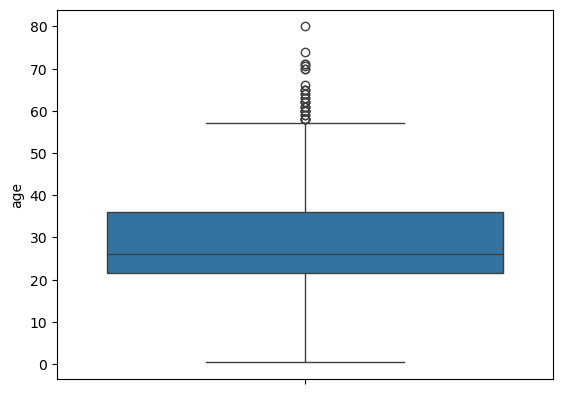

In [13]:
sns.boxplot(data['age'])

In [14]:
# 1st step -----standardization technique:

#from sklearn.preprocessing import StandardScaler
#scaling=StandardScaler()
#data['agestandard']=scaling.fit_transform(data[['age']])
#outliers = data[np.abs(data['agestandard'])>3]
#no_outlier=data[np.abs(data['agestandard'])<=3]
#outliers

#  2nd Step ------  IQR technique

#  3rd Step ------ Robust scaler

#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#scaled_data = scaler.fit_transform(data[['age']])
#scaled_dataframe=pd.DataFrame(scaled_data)
#scaled_dataframe

# 4th step------Winsorization

from scipy.stats.mstats import winsorize
winsorized_data = winsorize(data['age'], limits=[0.05, 0.05])  # Capping at 5th and 95th percentile
winsorized_data
winsorized_dataframe=pd.DataFrame(winsorized_data)

#5th step----Transformation Technique  (boxcox,log,square root)

#6th Step----Isolation Forest

#from sklearn.ensemble import IsolationForest
#iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
#outliers = iso_forest.fit_predict(data[['age']]) == -1
#cleaned_data = data[~outliers]
#cleaned_data 

#7th Step----- Local Outlier Factor (LOF)

#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
#outliers = lof.fit_predict(data[['age']]) == -1
#cleaned_data = data[~outliers]
#cleaned_data



<Axes: >

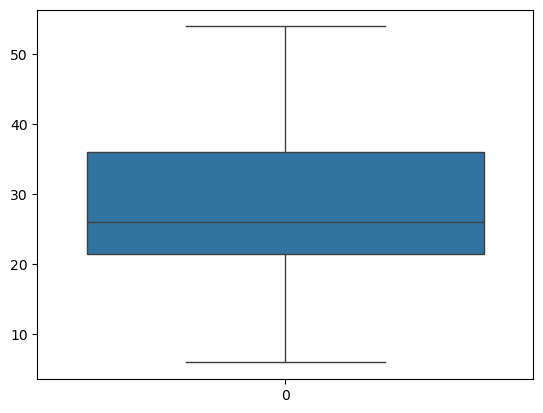

In [15]:
sns.boxplot(winsorized_dataframe)

In [16]:
data['age']=winsorized_dataframe

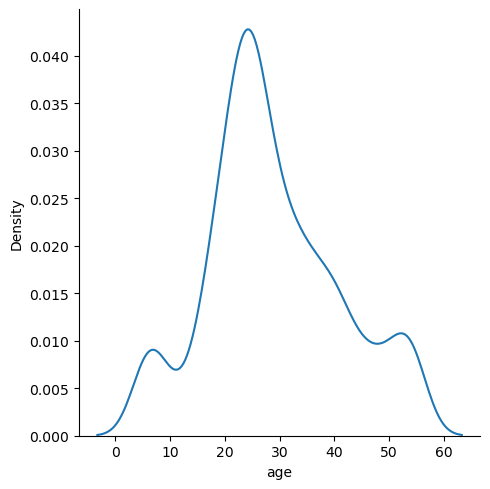

In [17]:
sns.displot(data['age'],kind='kde')

In [18]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
data[data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,54.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [20]:
data.groupby('deck')['embark_town'].describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\4004243757.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('deck')['embark_town'].describe()


,count,unique,top,freq
deck,,,,
A,15,2,Southampton,8
B,45,2,Southampton,23
C,59,3,Southampton,36
D,33,2,Southampton,20
E,32,3,Southampton,26
F,13,3,Southampton,11
G,4,1,Southampton,4


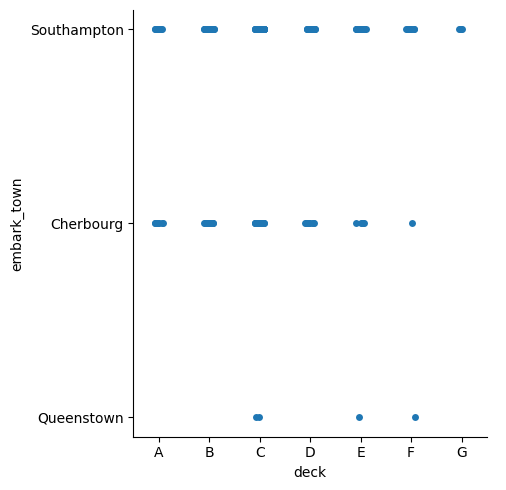

In [21]:
sns.catplot(x='deck',y='embark_town',data=data)

In [22]:
data['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [23]:
data.drop(columns=['deck'],inplace=True)

In [24]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [25]:
data['embarked'].fillna(value='S',inplace=True)
data['embark_town'].fillna(value='Southampton',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\3338079215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(value='S',inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_15656\3338079215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [26]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

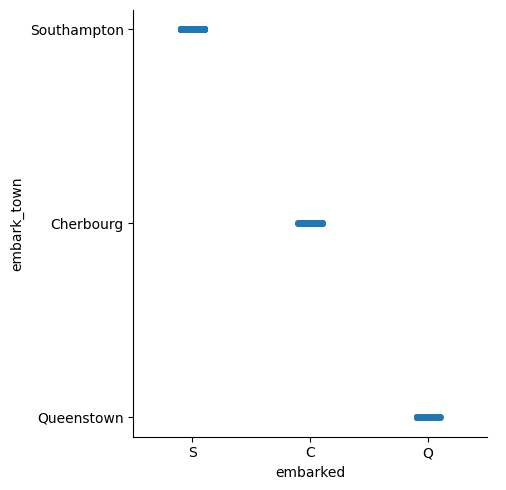

In [27]:
sns.catplot(x='embarked',y='embark_town',data=data)

In [28]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,25.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,6.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [29]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [30]:
data['adult_male'].unique()

array([ True, False])

In [31]:
data.groupby(['survived'])['alive'].describe()

,count,unique,top,freq
survived,,,,
0,549,1,no,549
1,342,1,yes,342


In [32]:
data.groupby(['embarked'])['embark_town'].describe()

,count,unique,top,freq
embarked,,,,
C,168,1,Cherbourg,168
Q,77,1,Queenstown,77
S,646,1,Southampton,646


In [33]:
data.groupby(['who'])['adult_male'].describe()

,count,unique,top,freq
who,,,,
child,83,1,False,83
man,537,1,True,537
woman,271,1,False,271


In [34]:
data.drop(columns=['embark_town','alive'],axis=1,inplace=True)

In [35]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [36]:
data.groupby(['sibsp'])['parch'].describe()

,count,mean,std,min,25%,50%,75%,max
sibsp,,,,,,,,
0,608.0,0.185855,0.585377,0.0,0.0,0.0,0.0,5.0
1,209.0,0.655502,1.049716,0.0,0.0,0.0,1.0,6.0
2,28.0,0.642857,0.869835,0.0,0.0,0.0,1.0,3.0
3,16.0,1.312500,0.704154,0.0,1.0,1.0,2.0,2.0
4,18.0,1.500000,0.514496,1.0,1.0,1.5,2.0,2.0
5,5.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
8,7.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


<Axes: ylabel='parch'>

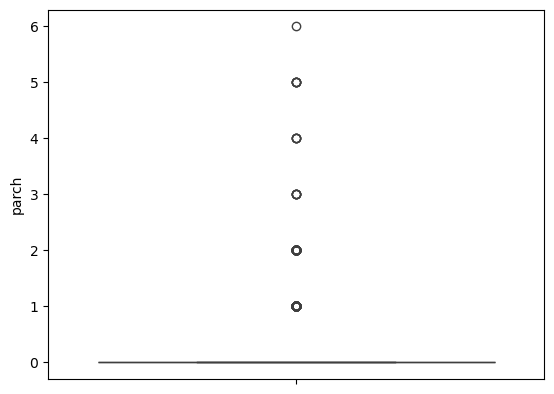

In [37]:
sns.boxplot(data['parch'])

<Axes: xlabel='sibsp', ylabel='Count'>

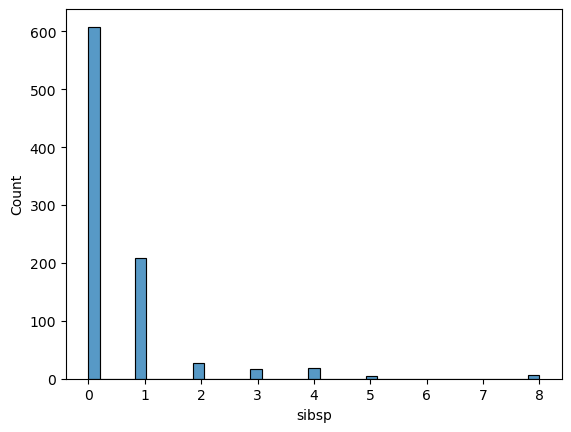

In [38]:
sns.histplot(data['sibsp'])

In [39]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [40]:
data.groupby(['survived'])['alone'].describe()

,count,unique,top,freq
survived,,,,
0,549,2,True,374
1,342,2,False,179


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


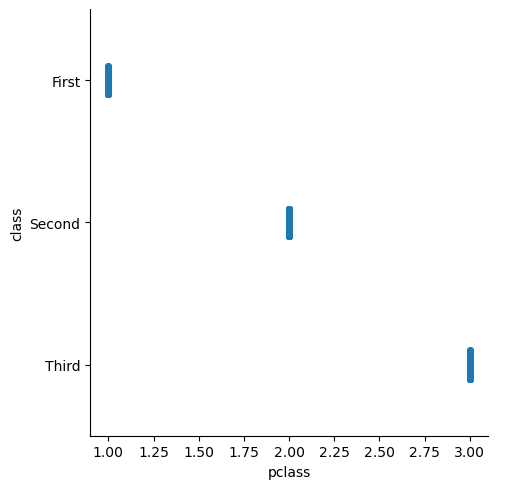

In [43]:
sns.catplot(data,x='pclass',y='class')
plt.show()

In [44]:
data.drop(columns=['class'],axis=1,inplace=True)

In [45]:
lbencode=LabelEncoder()
data['who']=lbencode.fit_transform(data['who'])
data['embarked']=lbencode.fit_transform(data['embarked'])

In [46]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,2,1,True,False
1,1,1,female,38.0,1,0,71.2833,0,2,False,False
2,1,3,female,26.0,0,0,7.9250,2,2,False,True
3,1,1,female,35.0,1,0,53.1000,2,2,False,False
4,0,3,male,35.0,0,0,8.0500,2,1,True,True


In [47]:
data['sex']=lbencode.fit_transform(data['sex'])
data['adult_male']=lbencode.fit_transform(data['adult_male'])
data['alone']=lbencode.fit_transform(data['alone'])

In [48]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,0,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,1


In [49]:
X=data.drop(columns=['survived'])
y=data['survived']

In [50]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,1,22.0,1,0,7.2500,2,1,1,0
1,1,0,38.0,1,0,71.2833,0,2,0,0
2,3,0,26.0,0,0,7.9250,2,2,0,1
3,1,0,35.0,1,0,53.1000,2,2,0,0
4,3,1,35.0,0,0,8.0500,2,1,1,1


In [51]:
cor_indepen=X.corr()
cor_indepen

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
pclass,1.000000,0.131900,-0.425516,0.083081,0.018443,-0.549500,0.162098,-0.196793,0.094035,0.135207
sex,0.131900,1.000000,0.098127,-0.114631,-0.245489,-0.182333,0.108262,-0.639773,0.908578,0.303646
age,-0.425516,0.098127,1.000000,-0.250718,-0.172241,0.129593,-0.005602,0.327065,0.257490,0.165143
sibsp,0.083081,-0.114631,-0.250718,1.000000,0.414838,0.159651,0.068230,-0.136003,-0.253586,-0.584471
parch,0.018443,-0.245489,-0.172241,0.414838,1.000000,0.216225,0.039798,-0.055682,-0.349943,-0.583398
fare,-0.549500,-0.182333,0.129593,0.159651,0.216225,1.000000,-0.224719,0.146290,-0.182024,-0.271832
embarked,0.162098,0.108262,-0.005602,0.068230,0.039798,-0.224719,1.000000,-0.064154,0.092526,0.063532
who,-0.196793,-0.639773,0.327065,-0.136003,-0.055682,0.146290,-0.064154,1.000000,-0.437532,0.006540
adult_male,0.094035,0.908578,0.257490,-0.253586,-0.349943,-0.182024,0.092526,-0.437532,1.000000,0.404744
alone,0.135207,0.303646,0.165143,-0.584471,-0.583398,-0.271832,0.063532,0.006540,0.404744,1.000000


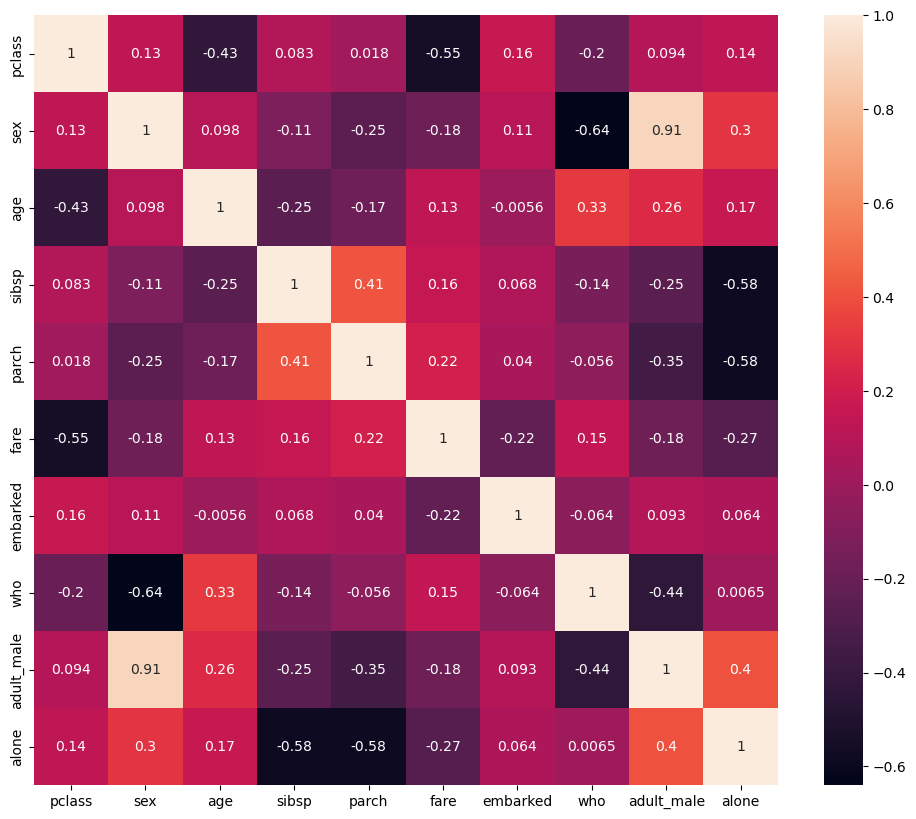

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(cor_indepen,annot=True)
plt.show()

In [53]:
## if our threshold value is 70 %(0.7) means if the correlation of two independent feature is 70 or More than 70,for that case we will keep 1 of 2
## here i means row j means column example:- i=size then for i=size we will do iteration columnwise like (j=tip,sex,smoker,day,time,size) , similarly
## for i=time we will do iteration columnwise like (j=tip,sex,smoker,day,time,size) and so on till i=day,smoker,....,tip

def correlation(dataset,threshold): ## threshold =70%
    corr_column=set()     # create  empty set to keep highly correlated feature
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: ## check if correlation of [i,j] >70% 
                column=corr_matrix.columns[i]      ## then we extract that feature 
                corr_column.add(column)     ## after that we add that feature into empty set
    return corr_column
corr_feature=correlation(X,0.8)

In [54]:
corr_feature

{'adult_male'}

In [55]:
# there is 91 % correlation b/w adult_male and sex so we will drop adault_male feature
X.drop(columns=['adult_male'],axis=1,inplace=True)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,3,1,22.0,1,0,7.2500,2,1,0
1,1,0,38.0,1,0,71.2833,0,2,0
2,3,0,26.0,0,0,7.9250,2,2,1
3,1,0,35.0,1,0,53.1000,2,2,0
4,3,1,35.0,0,0,8.0500,2,1,1


In [56]:
### we will the best feature for model here i have used pearson correlation 

In [57]:
from sklearn.model_selection import train_test_split,KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_recall_curve,classification_report

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
# Define the logistic regression model
model = LogisticRegression(max_iter=10000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with KFold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print("Classification Report:")

Accuracy: 0.8100558659217877
Classification Report:


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
350 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _ch

In [63]:
print(best_params)
print(best_model)

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1, max_iter=10000)
